In [74]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [37]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

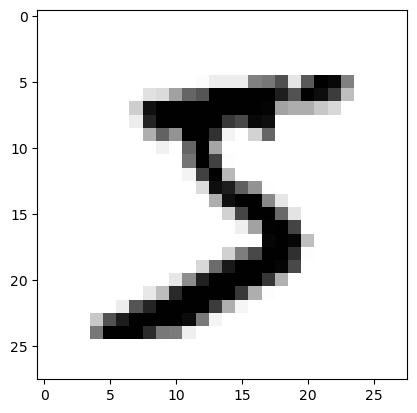

In [38]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [39]:
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

- 워후 이것도 28 * 28 이구나~ 흑백이니까 255로 스케일링 해줘야징

## 종속변수 확인

In [40]:
np.min(y_test)

np.uint8(0)

In [41]:
np.max(y_test)

np.uint8(9)

- 이것도 10개의 범주형 데이터임

In [42]:
scaled_train = x_train.reshape(-1, 28,28,1) / 255
scaled_test = x_test.reshape(-1, 28,28,1) / 255

In [43]:
scaled_train.shape

(60000, 28, 28, 1)

In [44]:
scaled_test.shape

(10000, 28, 28, 1)

In [45]:
scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train,
    y_train, 
    test_size=0.3,
    stratify=y_train,
    random_state=666
)

In [46]:
scaled_train.shape, scaled_val.shape, y_val.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (18000,))

In [47]:
# 나중에 과정보고 싶으니까 api 로 해야지~~

In [48]:
# 맛집 레시피가보자
model = keras.Sequential()

# 입력층
model.add(keras.Input(shape = (28,28,1)))

# 합성곱층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding = "same"))

# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

# 두 번째 합성곱 - 풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation="relu", padding= "same"))
model.add(keras.layers.MaxPool2D(2))

# 1차원~~~
model.add(keras.layers.Flatten())

# 과대적합 방지

model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))

# 출력층
model.add(keras.layers.Dense(10, activation = "softmax"))

In [49]:
# 모델 구조 확인
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# 콜백 친구들 넣고
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn-mnist-model.keras",save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights= True)

# 모델 설정하고 
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

# 적용해라
history = model.fit(
    scaled_train, 
    y_train, 
    epochs=20, 
    validation_data=(scaled_test, y_test), 
    callbacks=[es_cb, cp_cb], 
    batch_size=32
)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9294 - loss: 0.2287 - val_accuracy: 0.9820 - val_loss: 0.0578
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9755 - loss: 0.0804 - val_accuracy: 0.9858 - val_loss: 0.0422
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9826 - loss: 0.0567 - val_accuracy: 0.9891 - val_loss: 0.0343
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9864 - loss: 0.0452 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.9902 - val_loss: 0.0279
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9908 - val_loss: 0.0316
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9918 - loss: 0

# 불러오기

In [51]:
best_mnist_model = keras.models.load_model("./model/best-cnn-mnist-model.keras")

In [53]:
# 그 모델의 층을 확인
best_mnist_model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [54]:
conv1 = model.layers[0]
conv_weights1 = conv1.weights[0].numpy()
print(conv_weights1.mean(), conv_weights1.std())

-0.01036462 0.2050345


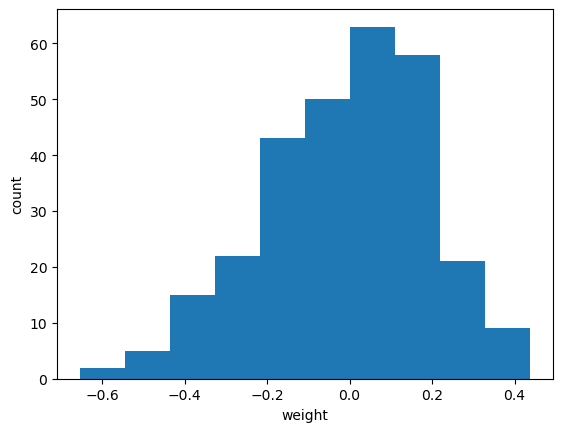

In [58]:
# 가중치 히스토그램

plt.figure()
plt.hist(conv_weights1.reshape(-1, 1)) # hist 함수는 데이터를 1차원 배열로 전달해야함

plt.xlabel("weight")
plt.ylabel("count")

plt.show()

# api 이용해서 슥~ 보기
- 다시 데이터 준비

In [64]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [67]:
x_train[[0]].shape

(1, 28, 28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 28, 28, 32)


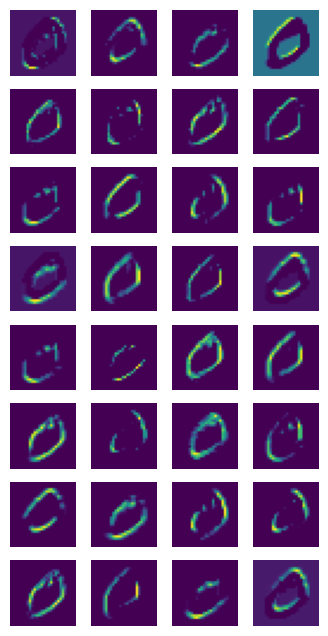

In [103]:
# 32개의 커널을 모두 시각화
# 위의 데이터를 첫 번째 합성곱층에 통과
inputs = x_train[[1]].reshape(-1, 28, 28, 1) / 255
conv_acti = keras.Model(model.inputs, model.layers[0].output)
feature_maps1 = conv_acti.predict(inputs)

print(feature_maps1.shape)
fig, axs = plt.subplots(8, 4, figsize= (4,8))

for i in range(8):
    for j in range(4):
        axs[i, j].imshow(feature_maps1[0,:,:, i * 4 + j])
        axs[i, j].axis("off")


plt.show()

# 일반화 성능 보자~

In [71]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0250     


[0.024974633008241653, 0.9926000237464905]

# 예측해보자

In [95]:
preds = np.argmax(model.predict(scaled_test), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [96]:
answers = y_test
predicts = model.predict(scaled_test)

answer_df = pd.DataFrame(
    {
        "ans" : answers,
        "predict" : preds,
    }
)
answer_df.head(20)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


,ans,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


# 못맞춘 애들은 대체 무어냐~

In [98]:
babo = answer_df[answer_df["ans"] != answer_df["predict"]]

In [104]:
babo

,ans,predict
582,8,2
583,2,7
674,5,3
882,9,7
938,3,5
...,...,...
9634,0,2
9692,9,7
9698,6,5
9729,5,6


In [100]:
len(babo) # 10000개 데이터 중에서 74개 정도 못맞췄다...

74

## 주로 뭘 착각했을까

In [107]:
babo["ans"].value_counts()

ans
9    14
8    12
6    10
7     9
5     8
0     6
4     5
3     4
2     3
1     3
Name: count, dtype: int64

- 9번 친구가 좀 맞추기가 어렵나...?

In [108]:
babo["predict"].value_counts()

predict
5    13
2    12
7     8
3     8
9     7
6     6
4     6
1     5
0     5
8     4
Name: count, dtype: int64

In [113]:
babo.groupby(["ans", "predict"]).value_counts()

ans  predict
0    2          2
     6          1
     7          1
     8          1
     9          1
1    3          1
     6          2
2    0          1
     7          2
3    5          2
     7          1
     8          1
4    2          1
     6          1
     9          3
5    3          5
     6          2
     8          1
6    0          2
     1          2
     4          2
     5          4
7    1          3
     2          6
8    0          2
     2          2
     3          1
     4          1
     5          2
     7          1
     9          3
9    2          1
     3          1
     4          3
     5          5
     7          3
     8          1
Name: count, dtype: int64

- 7번을 2번이라고 착각하는게 무려 6번!!!!!!!!
- 9번을 5번이라고 착각하는게 무려 5번!!!!!!!!

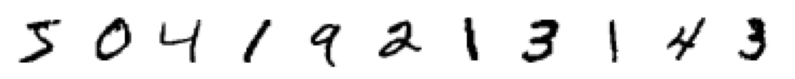

In [145]:
fig, axs = plt.subplots(1, 11, figsize= (10,20))
for i in range(11):
    axs[i].imshow(x_train[i], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()